In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('dataset\healthcare-dataset-stroke-data2.csv')
df.head()

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Unnamed: 0.1,id
0,0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,NaN,NaN
1,1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked,1,NaN,NaN
2,2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,NaN,NaN
3,3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,NaN,NaN
4,4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13717 entries, 0 to 13716
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         13717 non-null  int64  
 1   gender             13717 non-null  object 
 2   age                13717 non-null  float64
 3   hypertension       13717 non-null  int64  
 4   heart_disease      13717 non-null  int64  
 5   ever_married       13717 non-null  object 
 6   work_type          13717 non-null  object 
 7   Residence_type     13717 non-null  object 
 8   avg_glucose_level  13717 non-null  float64
 9   bmi                13717 non-null  float64
 10  smoking_status     13717 non-null  object 
 11  stroke             13717 non-null  int64  
 12  Unnamed: 0.1       5000 non-null   float64
 13  id                 5000 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 1.5+ MB


In [83]:
df.isnull().sum()

Unnamed: 0              0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status          0
stroke                  0
Unnamed: 0.1         8717
id                   8717
dtype: int64

In [46]:
df.drop(columns=['Unnamed: 0.1','id', 'Unnamed: 0'], inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.60,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
13712,Male,38.0,0,1,No,Self-employed,Rural,115.91,28.32,never smoked,0
13713,Female,69.0,0,0,Yes,Govt_job,Rural,93.43,27.01,formerly smoked,0
13714,Female,69.0,0,0,No,Govt_job,Urban,191.69,21.74,smokes,0
13715,Female,29.0,1,0,Other,Private,Urban,96.07,23.61,never smoked,0


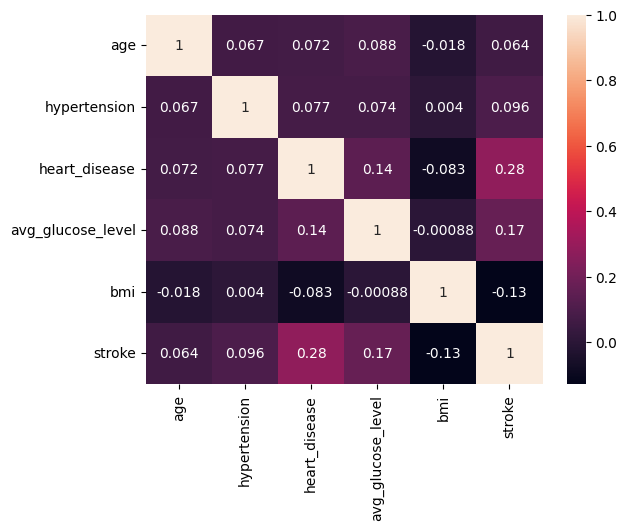

In [77]:
ax = sns.heatmap(df.corr(), annot=True)

In [47]:
# low =np.percentile(df['avg_glucose_level'],25)
# upp =np.percentile(df['avg_glucose_level'],75)
# iqr_value = stats.iqr(df['avg_glucose_level'])
# low_value = low-iqr_value*1.5
# upp_value = upp+iqr_value*1.5


# plt.figure(figsize=(12,8))
# plt.title('Distribution sum of values')
# mean_weight=np.mean(df['avg_glucose_level'])
# median_weight=np.median(df['avg_glucose_level'])

# Q1 = np.percentile(df['avg_glucose_level'],25)
# Q3 = np.percentile(df['avg_glucose_level'],75)
# plt.axvline(x=mean_weight,color='red',ls='--',label='Mean')
# plt.axvline(x=median_weight,color='green',ls='-',label='Median')
# plt.axvline(x=Q1,color='orange',ls=':',label='Q1')
# plt.axvline(x=Q3,color='orange',ls=':',label='Q3')
# plt.axvline(x=low_value,color='black',ls=':',label='outlier range')
# plt.axvline(x=upp_value,color='black',ls=':',label='outlier range')

# plt.legend()
# sns.displot(df['avg_glucose_level'], bins=23)
# plt.xlabel('value of avg_glucose_level')

In [48]:
outliers= []
non_out = []
def detect_outliers(data):
  threshold=3
  mean = np.mean(data)
  std = np.std(data)

  for i in data:
    z_score = (i - mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(i)

    if np.abs(z_score) < threshold:
      non_out.append(i)

  return outliers

In [49]:
detect_outliers(df['avg_glucose_level'])

[259.63,
 263.32,
 271.74,
 267.76,
 266.59,
 255.17,
 267.61,
 260.85,
 263.56,
 261.67,
 256.74,
 267.6]

In [50]:
outliers= []
non_out = []
def detect_outliers(data):
  threshold=3
  mean = np.mean(data)
  std = np.std(data)

  for i in data:
    z_score = (i - mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(i)

    if np.abs(z_score) < threshold:
      non_out.append(i)

  return outliers

In [51]:
detect_outliers(df['bmi'])

[56.6,
 54.6,
 60.9,
 54.7,
 64.8,
 54.7,
 60.2,
 51.0,
 51.5,
 71.9,
 54.6,
 55.7,
 57.5,
 54.2,
 52.3,
 78.0,
 53.4,
 55.2,
 50.6,
 55.0,
 54.8,
 52.8,
 66.8,
 55.1,
 55.9,
 57.3,
 57.3,
 56.0,
 51.8,
 57.7,
 54.0,
 56.1,
 53.9,
 53.8,
 52.7,
 52.8,
 55.7,
 53.5,
 50.5,
 51.9,
 63.3,
 52.8,
 52.8,
 61.2,
 58.1,
 50.4,
 52.7,
 51.9,
 53.4,
 59.7,
 52.5,
 52.9,
 54.7,
 61.6,
 53.8,
 54.3,
 55.0,
 50.9,
 50.6,
 57.2,
 64.4,
 92.0,
 50.8,
 55.9,
 57.9,
 55.7,
 57.2,
 51.7,
 60.9,
 54.1,
 56.6]

In [52]:
outliers_strk_data = df.copy()
outliers_strk_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.60,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
13712,Male,38.0,0,1,No,Self-employed,Rural,115.91,28.32,never smoked,0
13713,Female,69.0,0,0,Yes,Govt_job,Rural,93.43,27.01,formerly smoked,0
13714,Female,69.0,0,0,No,Govt_job,Urban,191.69,21.74,smokes,0
13715,Female,29.0,1,0,Other,Private,Urban,96.07,23.61,never smoked,0


In [53]:
IQR_dataset = sorted(outliers_strk_data['bmi'])
IQR_dataset

[11.3,
 11.5,
 14.1,
 14.2,
 15.0,
 15.01,
 15.01,
 15.02,
 15.02,
 15.02,
 15.03,
 15.03,
 15.03,
 15.03,
 15.03,
 15.04,
 15.04,
 15.04,
 15.05,
 15.05,
 15.05,
 15.06,
 15.06,
 15.06,
 15.06,
 15.07,
 15.07,
 15.07,
 15.07,
 15.08,
 15.08,
 15.08,
 15.08,
 15.09,
 15.09,
 15.09,
 15.09,
 15.09,
 15.09,
 15.1,
 15.1,
 15.1,
 15.1,
 15.1,
 15.1,
 15.11,
 15.11,
 15.11,
 15.11,
 15.11,
 15.11,
 15.11,
 15.11,
 15.11,
 15.11,
 15.12,
 15.12,
 15.12,
 15.14,
 15.14,
 15.14,
 15.15,
 15.15,
 15.16,
 15.16,
 15.19,
 15.19,
 15.19,
 15.2,
 15.21,
 15.22,
 15.22,
 15.22,
 15.22,
 15.22,
 15.23,
 15.23,
 15.23,
 15.24,
 15.24,
 15.24,
 15.24,
 15.24,
 15.24,
 15.25,
 15.25,
 15.25,
 15.25,
 15.25,
 15.26,
 15.26,
 15.26,
 15.26,
 15.27,
 15.27,
 15.27,
 15.27,
 15.27,
 15.27,
 15.28,
 15.28,
 15.28,
 15.29,
 15.29,
 15.29,
 15.29,
 15.29,
 15.3,
 15.3,
 15.3,
 15.31,
 15.31,
 15.32,
 15.32,
 15.32,
 15.33,
 15.33,
 15.33,
 15.33,
 15.33,
 15.34,
 15.34,
 15.34,
 15.35,
 15.35,
 15.35,
 15.35,

In [54]:
q1,q3 = np.percentile(IQR_dataset,[25,75])

print(q1,q3)

22.8 33.8


In [55]:
iqr = q3-q1
print(iqr)

10.999999999999996


In [56]:
# Find the lower fence and higher fence
lower_fence = q1-1.5*iqr
higher_fence = q3+1.5*iqr
print(lower_fence, higher_fence)

6.300000000000008 50.29999999999999


In [57]:
IQR_dataset = sorted(outliers_strk_data['avg_glucose_level'])
IQR_dataset

[55.12,
 55.22,
 55.23,
 55.25,
 55.26,
 55.27,
 55.28,
 55.32,
 55.34,
 55.42,
 55.46,
 55.47,
 55.57,
 55.58,
 55.62,
 55.64,
 55.67,
 55.72,
 55.78,
 55.83,
 55.84,
 55.93,
 55.96,
 56.07,
 56.07,
 56.08,
 56.08,
 56.11,
 56.11,
 56.11,
 56.12,
 56.12,
 56.13,
 56.18,
 56.23,
 56.31,
 56.33,
 56.34,
 56.37,
 56.42,
 56.42,
 56.43,
 56.47,
 56.48,
 56.48,
 56.51,
 56.63,
 56.64,
 56.67,
 56.71,
 56.74,
 56.75,
 56.75,
 56.79,
 56.84,
 56.85,
 56.85,
 56.87,
 56.89,
 56.9,
 56.9,
 56.94,
 56.95,
 56.96,
 56.99,
 57.02,
 57.06,
 57.08,
 57.1,
 57.15,
 57.17,
 57.26,
 57.28,
 57.3,
 57.33,
 57.38,
 57.4,
 57.42,
 57.42,
 57.43,
 57.46,
 57.47,
 57.51,
 57.51,
 57.52,
 57.56,
 57.56,
 57.57,
 57.57,
 57.59,
 57.6,
 57.76,
 57.77,
 57.79,
 57.82,
 57.83,
 57.89,
 57.92,
 57.92,
 57.93,
 57.96,
 58.01,
 58.01,
 58.09,
 58.19,
 58.19,
 58.23,
 58.24,
 58.25,
 58.29,
 58.3,
 58.35,
 58.37,
 58.38,
 58.39,
 58.39,
 58.41,
 58.42,
 58.42,
 58.47,
 58.48,
 58.51,
 58.55,
 58.57,
 58.63,
 58.63,

In [58]:
q1,q3 = np.percentile(IQR_dataset,[25,75])

print(q1,q3)

85.25 158.82


In [59]:
iqr = q3-q1
print(iqr)

73.57


In [60]:
# Find the lower fence and higher fence
lower_fence = q1-1.5*iqr
higher_fence = q3+1.5*iqr
print(lower_fence, higher_fence)

-25.10499999999999 269.17499999999995


In [61]:
# lower_outl=outliers_strk_data[outliers_strk_data['age']>20]
# lower_outl

In [4]:
df2 = df.copy()
df2

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Unnamed: 0.1,id
0,0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1,NaN,NaN
1,1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.60,never smoked,1,NaN,NaN
2,2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1,NaN,NaN
3,3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1,NaN,NaN
4,4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13712,13712,Male,38.0,0,1,No,Self-employed,Rural,115.91,28.32,never smoked,0,4995.0,94781.0
13713,13713,Female,69.0,0,0,Yes,Govt_job,Rural,93.43,27.01,formerly smoked,0,4996.0,78630.0
13714,13714,Female,69.0,0,0,No,Govt_job,Urban,191.69,21.74,smokes,0,4997.0,33282.0
13715,13715,Female,29.0,1,0,Other,Private,Urban,96.07,23.61,never smoked,0,4998.0,22187.0


In [63]:
df2=df2[df2['avg_glucose_level']>-25.10499999999999]
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.60,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
13712,Male,38.0,0,1,No,Self-employed,Rural,115.91,28.32,never smoked,0
13713,Female,69.0,0,0,Yes,Govt_job,Rural,93.43,27.01,formerly smoked,0
13714,Female,69.0,0,0,No,Govt_job,Urban,191.69,21.74,smokes,0
13715,Female,29.0,1,0,Other,Private,Urban,96.07,23.61,never smoked,0


In [64]:
df2=df2[df2['avg_glucose_level']<269.17499999999995]
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.60,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
13712,Male,38.0,0,1,No,Self-employed,Rural,115.91,28.32,never smoked,0
13713,Female,69.0,0,0,Yes,Govt_job,Rural,93.43,27.01,formerly smoked,0
13714,Female,69.0,0,0,No,Govt_job,Urban,191.69,21.74,smokes,0
13715,Female,29.0,1,0,Other,Private,Urban,96.07,23.61,never smoked,0


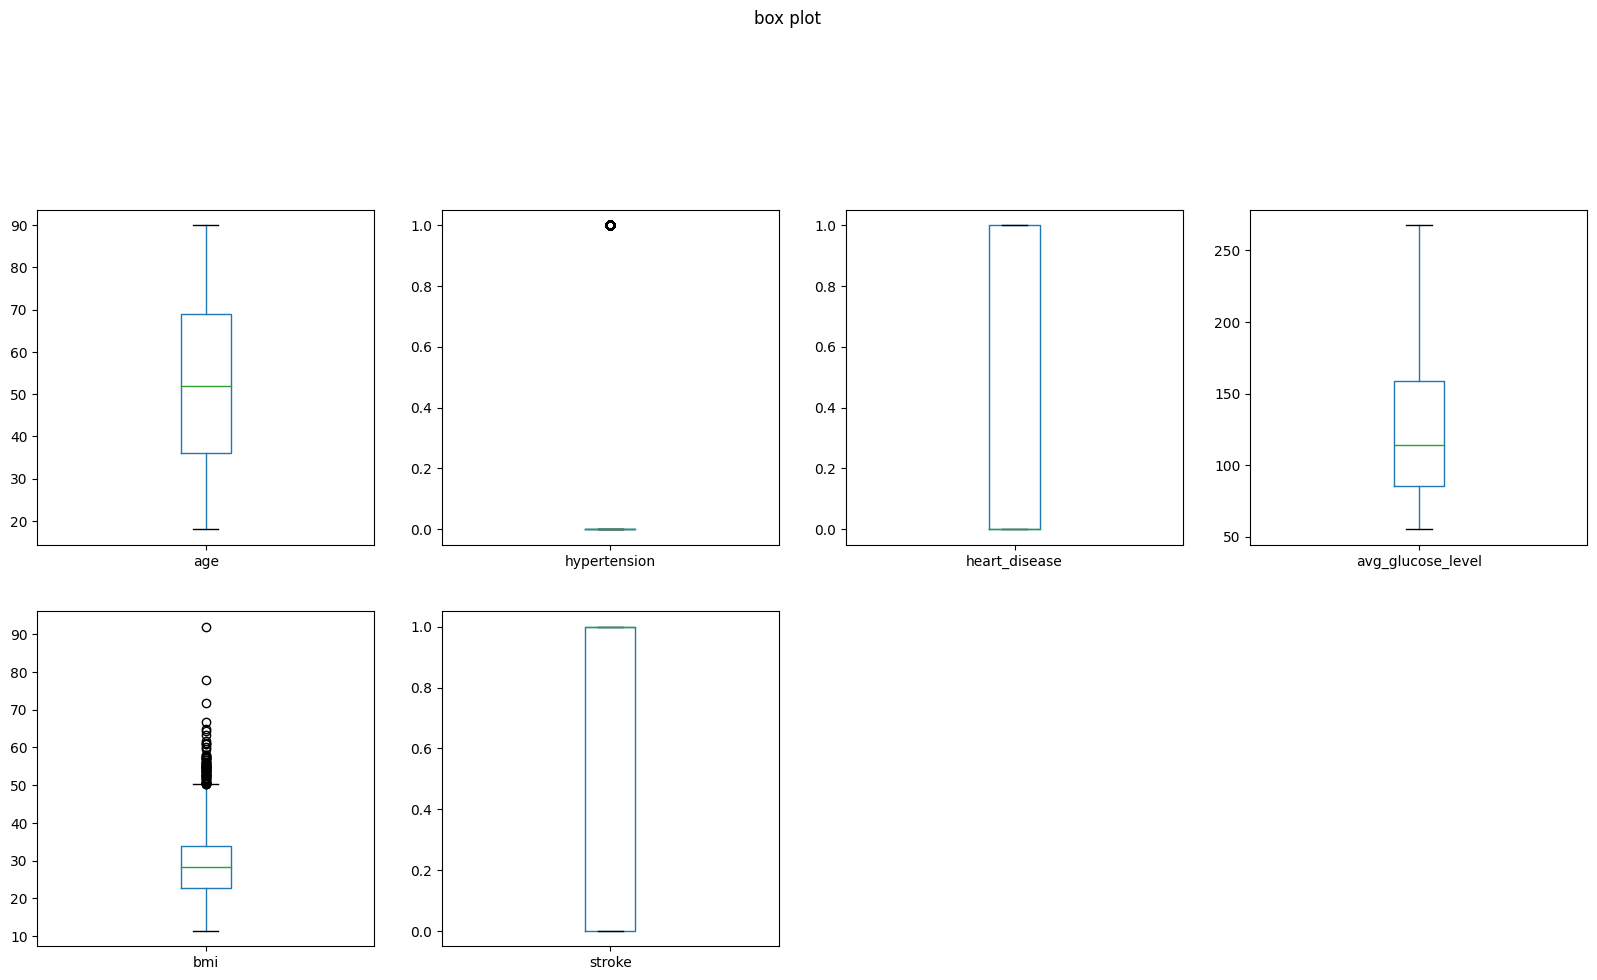

In [65]:

df2.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=[20,20], title='box plot')
plt.savefig('outliers_strk_data_boxplot')
plt.show()

In [66]:
df2=df2[df2['bmi']>6.300000000000008]
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.60,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
13712,Male,38.0,0,1,No,Self-employed,Rural,115.91,28.32,never smoked,0
13713,Female,69.0,0,0,Yes,Govt_job,Rural,93.43,27.01,formerly smoked,0
13714,Female,69.0,0,0,No,Govt_job,Urban,191.69,21.74,smokes,0
13715,Female,29.0,1,0,Other,Private,Urban,96.07,23.61,never smoked,0


In [67]:
df2=df2[df2['bmi']<50.29999999999999]
df2 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.60,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
13712,Male,38.0,0,1,No,Self-employed,Rural,115.91,28.32,never smoked,0
13713,Female,69.0,0,0,Yes,Govt_job,Rural,93.43,27.01,formerly smoked,0
13714,Female,69.0,0,0,No,Govt_job,Urban,191.69,21.74,smokes,0
13715,Female,29.0,1,0,Other,Private,Urban,96.07,23.61,never smoked,0


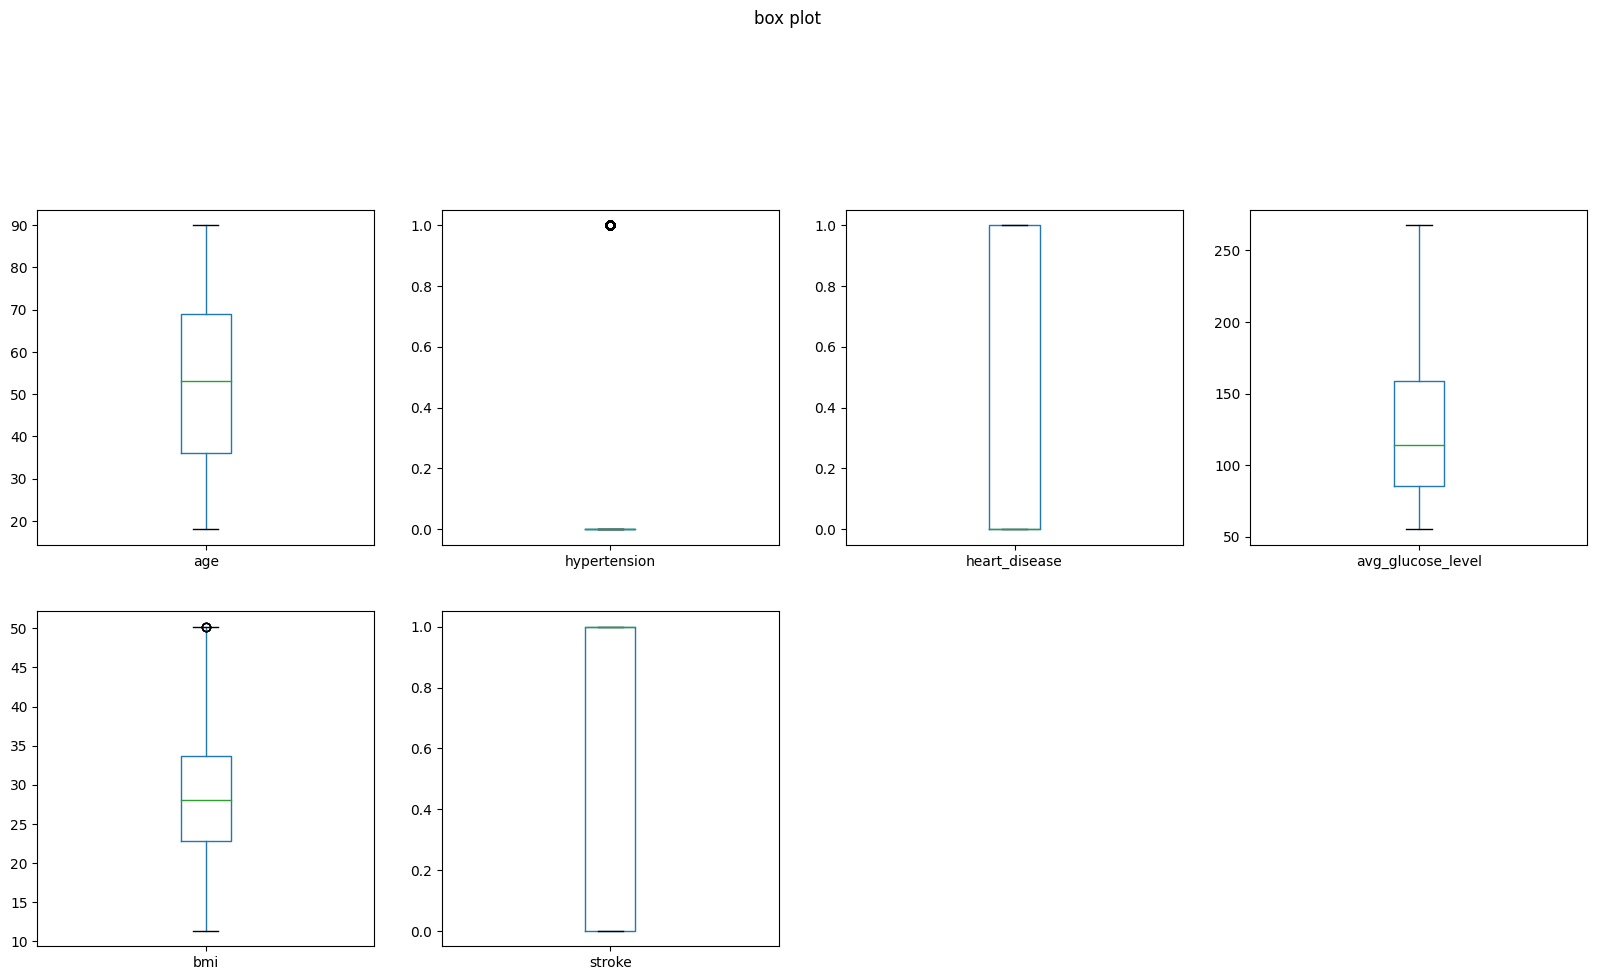

In [68]:
df2.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=[20,20], title='box plot')
plt.savefig('outliers_strk_data_boxplot')
plt.show()

In [69]:
df2['stroke'].value_counts()

1    7208
0    6435
Name: stroke, dtype: int64

<AxesSubplot:>

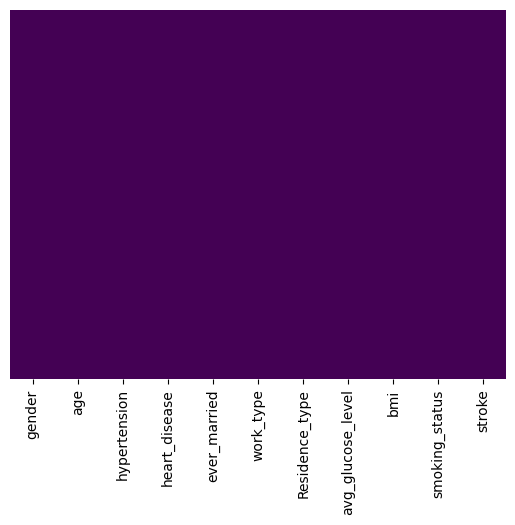

In [70]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
y= df2['stroke']
y

0        1
1        1
2        1
3        1
4        1
        ..
13712    0
13713    0
13714    0
13715    0
13716    0
Name: stroke, Length: 13717, dtype: int64

In [6]:
X = df2.drop(['stroke'], axis=1)
X

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Unnamed: 0.1,id
0,0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,NaN,NaN
1,1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.60,never smoked,NaN,NaN
2,2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,NaN,NaN
3,3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,NaN,NaN
4,4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13712,13712,Male,38.0,0,1,No,Self-employed,Rural,115.91,28.32,never smoked,4995.0,94781.0
13713,13713,Female,69.0,0,0,Yes,Govt_job,Rural,93.43,27.01,formerly smoked,4996.0,78630.0
13714,13714,Female,69.0,0,0,No,Govt_job,Urban,191.69,21.74,smokes,4997.0,33282.0
13715,13715,Female,29.0,1,0,Other,Private,Urban,96.07,23.61,never smoked,4998.0,22187.0


In [73]:
#solving imbalanced dataset

In [74]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X, y)
# print('Resampled dataset shape %s' % Counter(y_res))

In [75]:
# from imblearn.over_sampling import (RandomOverSampler)
# from collections import Counter

In [76]:
resamp = RandomOverSampler()
X, y = resamp.fit_resample(X, y )
print('Resampled dataset shape %s' % Counter(y))

NameError: name 'RandomOverSampler' is not defined

In [7]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

print(num_features, '............', cat_features)

Index(['Unnamed: 0', 'age', 'hypertension', 'heart_disease',
       'avg_glucose_level', 'bmi', 'Unnamed: 0.1', 'id'],
      dtype='object') ............ Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((10914, 10), (2729, 10))

In [ ]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression



def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier
()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Root Mean Squared Error: 0.5409
- Mean Absolute Error: 0.2926
- R2 Score: -0.1744
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5315
- Mean Absolute Error: 0.2825
- R2 Score: -0.1324


K-Neighbors Classifier
Model performance for Training set
- Root Mean Squared Error: 0.4655
- Mean Absolute Error: 0.2167
- R2 Score: 0.1301
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5528
- Mean Absolute Error: 0.3056
- R2 Score: -0.2249


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5869
- Mean Absolute Error: 0.3444
- R2 Score: -0.3806


Random Forest Classifier
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Sco